In [1]:
!pip install memory_profiler

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import shap
import time
from memory_profiler import memory_usage

/usr/local/lib/python3.12/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
df = pd.read_csv(r'/content/Students Social Media Addiction.csv')

In [4]:
print(df.head(5))
print(df.describe())


   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Soc

In [5]:
print(df.info())
print(df.isnull().sum())
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [6]:
cat_cols = [
    'Gender', 'Academic_Level', 'Country',
    'Most_Used_Platform', 'Affects_Academic_Performance',
    'Relationship_Status'
]

for col in cat_cols:
    df[col] = df[col].astype('category')



In [7]:
plt.style.use("seaborn-v0_8")
sns.set_palette("viridis")


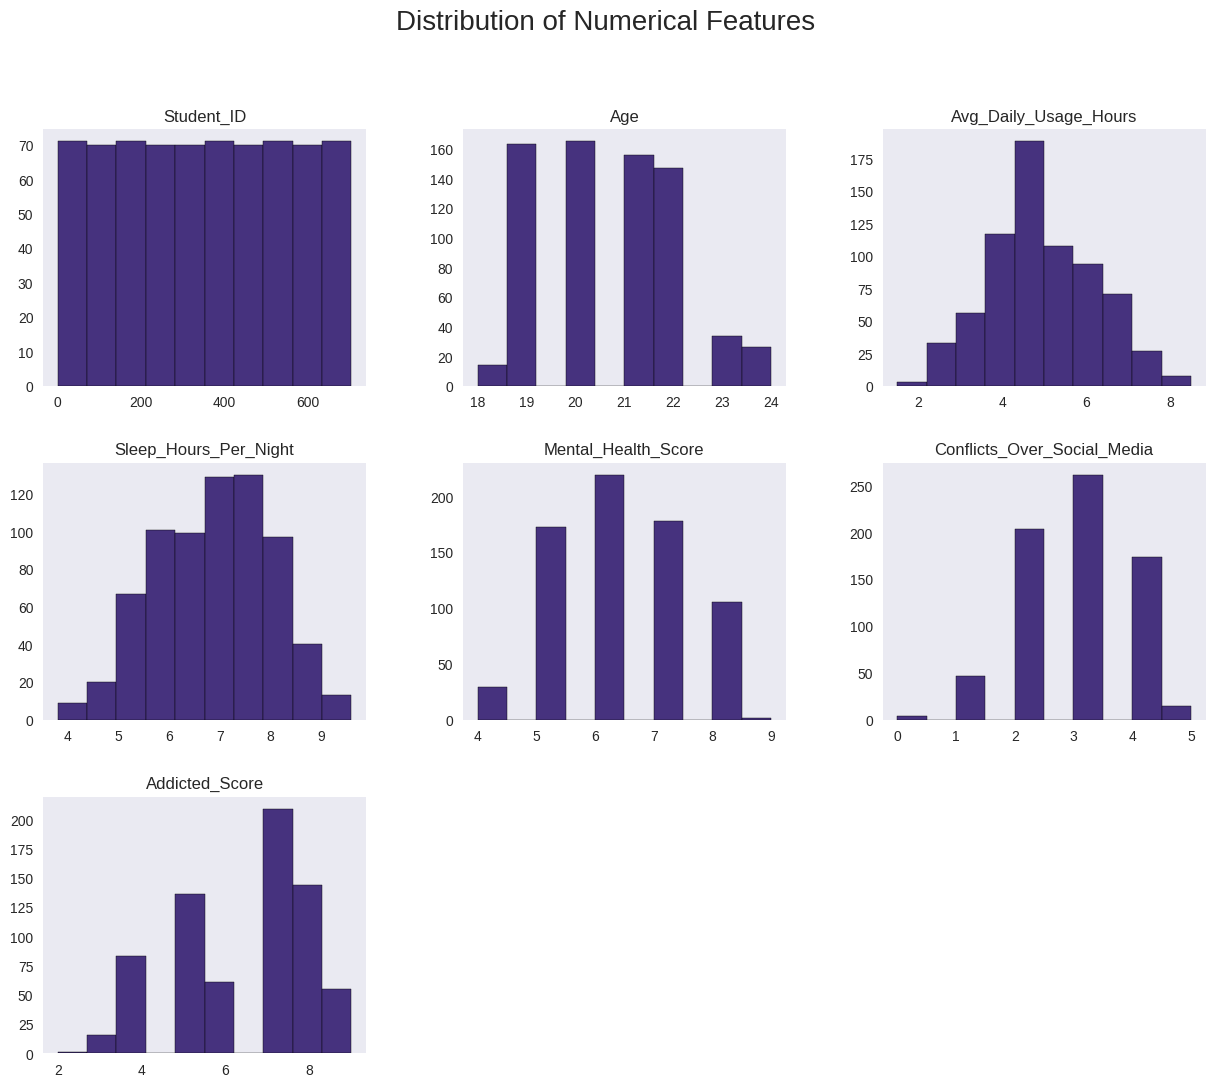

In [8]:
df.hist(figsize=(15, 12), edgecolor='black', grid=False)
plt.suptitle("Distribution of Numerical Features", fontsize=20)
plt.show()


/tmp/ipython-input-1795742234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


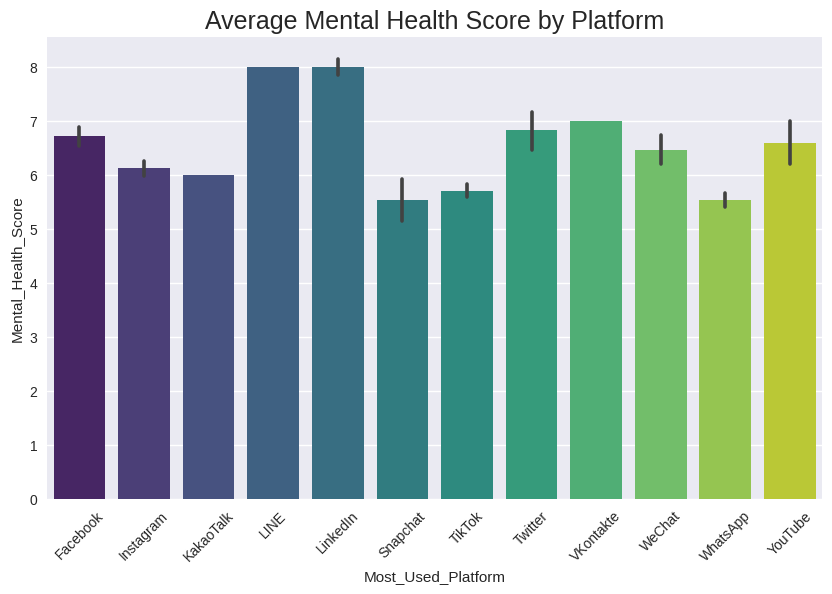

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='Most_Used_Platform',
    y='Mental_Health_Score',
    palette='viridis'
)
plt.xticks(rotation=45)
plt.title("Average Mental Health Score by Platform", fontsize=18)
plt.show()


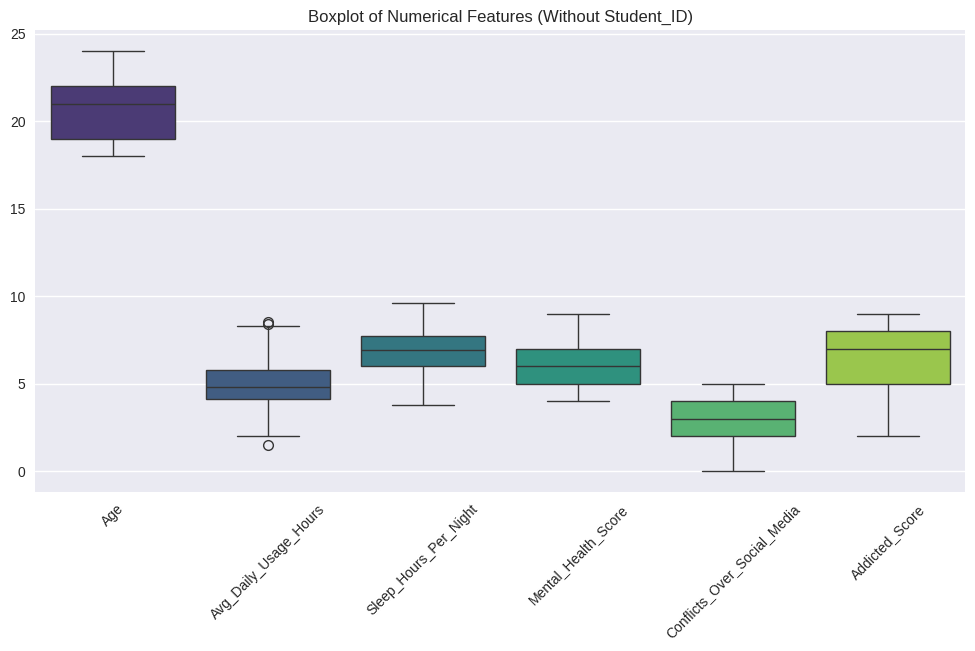

In [12]:
num_cols = ['Age','Avg_Daily_Usage_Hours','Sleep_Hours_Per_Night',
            'Mental_Health_Score','Conflicts_Over_Social_Media','Addicted_Score']

plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Without Student_ID)")
plt.show()


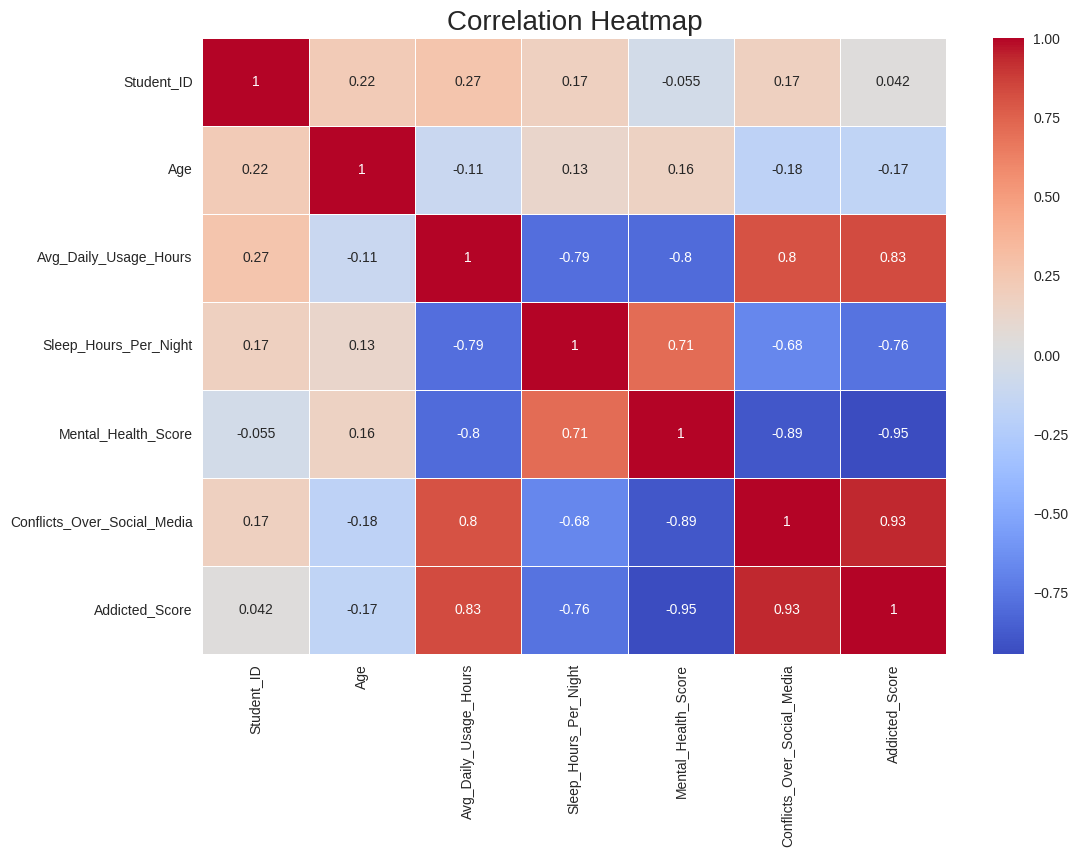

In [11]:
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()
